In [1]:
# !pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Summary Extraction using Newspaper3k

In [2]:
from newspaper import Article
from newspaper import Config
import nltk
import pandas as pd
#The user agent has to be obtained from the https://www.whatismybrowser.com/detect/what-is-my-user-agent for running on your system!
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
config = Config()
config.browser_user_agent = user_agent

In [3]:
url ="https://colombiacheck.com/index.php/chequeos/cifras-de-covid-19-en-vacunados-de-israel-son-usadas-para-desinformar-sobre-las-vacunas"

In [4]:
news = Article(url,lang='es', config=config) 
news.download()
news.parse()
nltk.download('punkt')
news.nlp()
# Extract summary
print(news.summary)

Diversos medios (1,2,3, 4, 5) que verificaron lo que se está difundiendo erróneamente de esta situación por COVID-19 tanto en Israel como en otros países como Inglaterra, también llegaron a esta conclusión.
Entonces los datos que publicó Zioni en sus tablas replicadas en Trikooba, así como en las otras publicaciones en redes sociales, son ciertos.
Debido a esta paradoja, la tendencia que se ve en un grupo de datos puede ser contraria a la que se encuentra al desagregarlos.
Y los casos severos y muertes en los últimos 3 meses en adultos mayores de 60 años, también han afectado más a los no vacunados.
La circulación de la variante delta, altamente transmisible y la relajación en las medidas tomadas por la pandemia son factores que influyeron en el nuevo pico que vive Israel.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# from google.colab import drive 
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Reading the training data
data = pd.read_csv('train.csv')

In [12]:
#Creating summary for all the URLs
def fil(url):
    try:
        news = Article(url, config=config) 
        news.download()
        news.parse()
        news.nlp()
        return news.summary
    except:
        return ''
data['summary'] = data.apply(lambda x: fil(x['Fact-checked Article']),axis=1)

ERROR:urllib3.connection:Certificate did not match expected hostname: www.colombiacheck.com. Certificate: {'subject': ((('commonName', 'colombiacheck.com'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', 'Google Trust Services LLC'),), (('commonName', 'GTS CA 1D4'),)), 'version': 3, 'serialNumber': '012DBDF1B5C3D3CC09E8B2846020711C', 'notBefore': 'Nov 10 16:28:13 2022 GMT', 'notAfter': 'Feb  8 16:28:12 2023 GMT', 'subjectAltName': (('DNS', 'colombiacheck.com'),), 'OCSP': ('http://ocsp.pki.goog/s/gts1d4/E1Je8Sfi38o',), 'caIssuers': ('http://pki.goog/repo/certs/gts1d4.der',), 'crlDistributionPoints': ('http://crls.pki.goog/gts1d4/KLT9VNR8wwI.crl',)}
Building prefix dict from /usr/local/lib/python3.7/dist-packages/jieba/dict.txt ...
DEBUG:jieba:Building prefix dict from /usr/local/lib/python3.7/dist-packages/jieba/dict.txt ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.5309991836547852 seconds.

In [13]:
#Saving the data as a csv
data.to_csv('results_config_autolangdet.csv', index= False)

In [5]:
# !pip install -U sentence-transformers -q

In [3]:
import pandas as pd
import numpy as np
np.random.seed(2022)

In [4]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# data = pd.read_csv(r"C:\Users\rmanoger\Desktop\CSE 472\Project 2\results_config_autolangdet.csv")
data = pd.read_csv("results_config_autolangdet.csv")

In [7]:
data.loc[data["summary"].isna(),'summary']=' '

In [8]:
data.head()

,Country (mentioned),Review Date,Claim,Source,Label,Fact-checked Article,summary
0,Germany,"Oct 15, 2021",A video is circulating on the Internet claimin...,person,0,https://dpa-factchecking.com/germany/201015-99...,«Durch Rückatmung unserer Ausatemluft entsteht...
1,United States,"Sep 17, 2021","Vice President Kamala Harris ""admits"" that COV...",website,0,https://leadstories.com/hoax-alert/2021/09/fac...,No Vax Is 100%Did Vice President Kamala Harris...
2,United States,"Sep 17, 2021",US to withhold benefits from unvaccinated vete...,multiple people,0,https://factcheck.afp.com/http%253A%252F%252Fd...,US not requiring Covid-19 shots for veterans t...
3,United States,"Sep 17, 2021",U.S. President Joe Biden said that the COVID-1...,No data,0,https://www.snopes.com/fact-check/biden-vaccin...,Advertisment:Claim: U.S. President Joe Biden s...
4,Canada,"Sep 16, 2021",customers will be required to provide ID and p...,facebook,0,http://checkyourfact.com/2021/09/16/fact-check...,An image shared on Facebook claims customers w...


In [9]:
# import spacy
# import string
# nlp = spacy.load("en_core_web_sm")
# stop_words = nlp.Defaults.stop_words
# print(stop_words)

{'have', 'after', 'herself', 'various', 'wherein', 're', 'became', 'was', 'because', 'anyhow', 'eight', 'thereafter', 'any', 'forty', 'will', 'doing', 'always', 'mostly', 'keep', 'we', 'side', 'which', 'its', 'them', 'anything', 'via', 'within', 'in', 'whenever', 'never', 'your', 'during', 'per', 'or', 'anyway', 'not', 'seem', 'upon', 'own', 'latter', 'say', 'amount', 'full', 'meanwhile', 'most', '’m', 'unless', 'between', 'on', 'yourself', 'among', 'could', 'who', 'quite', 'sometimes', '’s', 'before', 'below', 'ours', 'her', 'towards', 'please', 'used', 'name', "'d", 'nine', 'here', 'whole', 'moreover', 'whereupon', 'without', '‘d', 'but', 'although', 'see', 'five', '‘re', 'myself', 'fifty', 'throughout', 'either', 'get', 'seems', 'still', 'now', '’ll', 'and', 'under', 'whither', 'beforehand', 'into', 'indeed', 'toward', 'of', 'nowhere', 'once', 'afterwards', 'due', 'seeming', 'somewhere', 'however', 'against', '‘m', 'all', 'amongst', 'they', 'former', 'those', 'you', 'every', 'do', '

In [10]:
# punctuations = string.punctuation
# print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
# def spacy_tokenizer(sentence):
#     doc = nlp(sentence)
#     mytokens = [ word.lemma_.lower().strip() for word in doc ]
#     mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
#     sentence = " ".join(mytokens)
#     return sentence

In [13]:
# data['tokenize_Claim'] = data['Claim'].apply(spacy_tokenizer)

In [14]:
# data['tokenize_summary'] = data['summary'].apply(spacy_tokenizer)

In [12]:
# data.head()

,Country (mentioned),Review Date,Claim,Source,Label,Fact-checked Article,summary
0,Germany,"Oct 15, 2021",A video is circulating on the Internet claimin...,person,0,https://dpa-factchecking.com/germany/201015-99...,«Durch Rückatmung unserer Ausatemluft entsteht...
1,United States,"Sep 17, 2021","Vice President Kamala Harris ""admits"" that COV...",website,0,https://leadstories.com/hoax-alert/2021/09/fac...,No Vax Is 100%Did Vice President Kamala Harris...
2,United States,"Sep 17, 2021",US to withhold benefits from unvaccinated vete...,multiple people,0,https://factcheck.afp.com/http%253A%252F%252Fd...,US not requiring Covid-19 shots for veterans t...
3,United States,"Sep 17, 2021",U.S. President Joe Biden said that the COVID-1...,No data,0,https://www.snopes.com/fact-check/biden-vaccin...,Advertisment:Claim: U.S. President Joe Biden s...
4,Canada,"Sep 16, 2021",customers will be required to provide ID and p...,facebook,0,http://checkyourfact.com/2021/09/16/fact-check...,An image shared on Facebook claims customers w...


In [15]:
# data['embeddings_Claim'] = data['tokenize_Claim'].apply(model.encode)

In [16]:
# data['embeddings_summary'] = data['tokenize_summary'].apply(model.encode)

In [112]:
#Mapping the redundant source names together 
Source_mapping ={'whataspp':'social media','website':'websites','social networks':'social media','lord sumption':'person',
'Social Networking Media Users':'social media', 'twitter':'social media','donald trump':'person','joe biden':'person',
'pereson':'person','perseon':'person','narendra modi':'person','news website':'news media','mutliple sources':'multiple sources',
'multiplie sources':'multiple sources', 'multipe sources':'multiple sources', 'Multiple sources':'multiple sources',
'multple sources':'multiple sources', 'multiple persons':'person', 'multiple people':'person',
'government':'government department','government party':'government department','government department':'others','political party':'others',
'government source':'government department','facbook':'social media','anthony fauci':'person', 'bernie sanders':'person', 'beverley turner':'person', 'boris johnson':'person', 'carlos bolsonaro':'person', 'eduardo pazuello':'person', 'emmanuel macron':'person', 'flavio bolsonaro':'person', 'flÃivio bolsonaro':'person', 'Harry Roque':'person', 'ione belarra':'person', 'jair bolsonaro':'person', 'michael yeedon':'person', 'tayyip erdogan':'person', 'sophia dorinskaya':'person', 'rodrigo duterte':'person', 
'nick donnelly':'person', 'social media ':'social media','youtube':'social media','reddit':'social media','instagram':'social media','meme':'social media',
'email':'social media','tiktok':'social media','telegram':'social media','whatsapp':'social media','facebook':'social media','Several sources':'multiple sources', 
'Jair Bolsonaro':'person','joão doria':'person','andrés manuel lópez obrador':'person','michał dworczyk':'person','michael "mike" defensor':'person','steven hotze':'person','flávio bolsonaro':'person','joão doria':'person', 'Jair Bolsonaro':'person','mike pence':'person',
'video':'others','photo':'others','study':'others','meme':'others','unknown':'others', 'No data':'others','audio recording':'others','scam':'others','viral image':'others','fake image':'others', 'fake document':'others','various authors':'others','health department':'others','daily expose':'others','telegraph':'others','doctors for life':'others'
}

In [113]:
data['Source'] = data['Source'].replace(Source_mapping)

In [114]:
data['Source'].value_counts()

social media        3675
multiple sources    1089
person               930
others               266
news media           266
websites             158
Name: Source, dtype: int64

In [21]:
#Top 10 contributing to 65 percent of the data..So using them and binning other countries together
data['Country (mentioned)'].value_counts()[:9]*100/len(data)

United States     21.788847
India             14.379699
Brazil            10.197368
United Kingdom     6.876566
Italy              3.947368
China              3.493108
France             2.662907
Spain              2.474937
Indonesia          2.427945
Name: Country (mentioned), dtype: float64

In [22]:
#Using only the top 10 countries as is and binning all the other countries together as "Others"
Country_mapping = {}
for country in data['Country (mentioned)'].unique():
    if country not in data['Country (mentioned)'].value_counts()[:10].index:
        Country_mapping[country] = 'Others'

Country_mapping

{'Germany': 'Others',
 'Canada': 'Others',
 'South Africa': 'Others',
 'Australia': 'Others',
 'Argentina': 'Others',
 'European ': 'Others',
 'Japan': 'Others',
 'United Statets': 'Others',
 'Europe': 'Others',
 'Bulgaria': 'Others',
 'Poland': 'Others',
 'Romania': 'Others',
 'Sri Lanka': 'Others',
 'Israel': 'Others',
 'Afghanistan': 'Others',
 'Denmark': 'Others',
 'Philippines': 'Others',
 'Mexico': 'Others',
 'Singapore': 'Others',
 'Iran': 'Others',
 'Burundi': 'Others',
 'Martinique': 'Others',
 'Thailand': 'Others',
 'Sweden': 'Others',
 'Greece': 'Others',
 'Iceland': 'Others',
 'Switzerland': 'Others',
 'North Korea': 'Others',
 'Pakistan': 'Others',
 'Malaysia': 'Others',
 'Colombia': 'Others',
 'South African': 'Others',
 'Ireland': 'Others',
 'Haiti': 'Others',
 'Paraguay': 'Others',
 'Turkey': 'Others',
 'Tanzania': 'Others',
 'Myanmar': 'Others',
 'Madagascar': 'Others',
 'Puerto Rico': 'Others',
 'Almeria': 'Others',
 'Belgium': 'Others',
 'Uganda': 'Others',
 'England

In [23]:
data['Country (mentioned)'] = data['Country (mentioned)'].replace(Country_mapping)

In [24]:
data['Country (mentioned)'].unique()

array(['Others', 'United States', 'United Kingdom', 'France', 'Spain',
       'Brazil', 'India', 'Italy', 'Portugal', 'Indonesia', 'China'],
      dtype=object)

In [25]:
data.columns

Index(['Country (mentioned)', 'Review Date', 'Claim', 'Source', 'Label',
       'Fact-checked Article', 'summary', 'tokenize_Claim', 'tokenize_summary',
       'embeddings_Claim', 'embeddings_summary'],
      dtype='object')

In [26]:
data.Claim[19]

'Hospitals in Oklahoma are overwhelmed with cases of people suffering ivermectin overdose after taking the drug as COVID-19 cure.'

In [27]:
data.summary[19]

'Online articles and social media posts claim that overdose cases from people using anti-parasitic drug ivermectin against COVID-19 are overwhelming hospitals in Oklahoma, citing remarks by a doctor in the US state.\nAlso Read: No, Bill Gates Did Not Call For Depopulation Through Forced Vaccination"Gunshot Victims Left Waiting as Horse Dewormer Overdoses Overwhelm Oklahoma Hospitals, Doctor Says," said a September 3, 2021 Rolling Stone magazine headline.\n"What we can confirm is that we have seen a handful of ivermectin patients in our emergency rooms, to include INTEGRIS Grove Hospital.\nScott Schaffer, director of the Oklahoma Center for Poison and Drug Information, told AFP that calls related to ivermectin remain relatively low.\n"In Mississippi it was reported that 70 percent of their calls were ivermectin related, but that was misinterpretation," he said.'

### Using cosine similarity of spaCy

In [28]:
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     --------------------------------------- 12.8/12.8 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.4.0
    Uninstalling en-core-web-sm-3.4.0:
      Successfully uninstalled en-core-web-sm-3.4.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
doc1 = nlp(u'Hospitals in Oklahoma are overwhelmed with cases of people suffering ivermectin overdose after taking the drug as COVID-19 cure.')
doc2 = nlp(u'Online articles and social media posts claim that overdose cases from people using anti-parasitic drug ivermectin against COVID-19 are overwhelming hospitals in Oklahoma, citing remarks by a doctor in the US state.\nAlso Read: No, Bill Gates Did Not Call For Depopulation Through Forced Vaccination"Gunshot Victims Left Waiting as Horse Dewormer Overdoses Overwhelm Oklahoma Hospitals, Doctor Says," said a September 3, 2021 Rolling Stone magazine headline.\n"What we can confirm is that we have seen a handful of ivermectin patients in our emergency rooms, to include INTEGRIS Grove Hospital.\nScott Schaffer, director of the Oklahoma Center for Poison and Drug Information, told AFP that calls related to ivermectin remain relatively low.\n"In Mississippi it was reported that 70 percent of their calls were ivermectin related, but that was misinterpretation," he said.')
print(doc1.similarity(doc2))  

0.6226362621064739


C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
data_cos_sim = data.copy()

In [62]:
data_cos_sim['cosine_sim_scores'] = data_cos_sim.apply(lambda x: nlp(x['Claim']).similarity(nlp(x['summary'])),axis=1)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.


### One hot Encoding

In [64]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd


transformer = make_column_transformer(
    (OneHotEncoder(), ['Country (mentioned)','Source']),
    remainder='passthrough')

transformed_cos_sim = transformer.fit_transform(data_cos_sim)
transformed_df_cos_sim = pd.DataFrame(
    transformed_cos_sim, 
    columns=transformer.get_feature_names()
)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [116]:
X.columns

Index(['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites', 'SBERT CrossEncoder_score'],
      dtype='object')

In [66]:
X = transformed_df_cos_sim[['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites','cosine_sim_scores']]
y = transformed_df_cos_sim['Label'].values
y=y.astype('int')

### Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

### Model Fitting

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [119]:
X_test.columns

Index(['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites', 'SBERT CrossEncoder_score'],
      dtype='object')

In [120]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [117]:
from sklearn import tree

In [123]:
import matplotlib.pyplot as plt

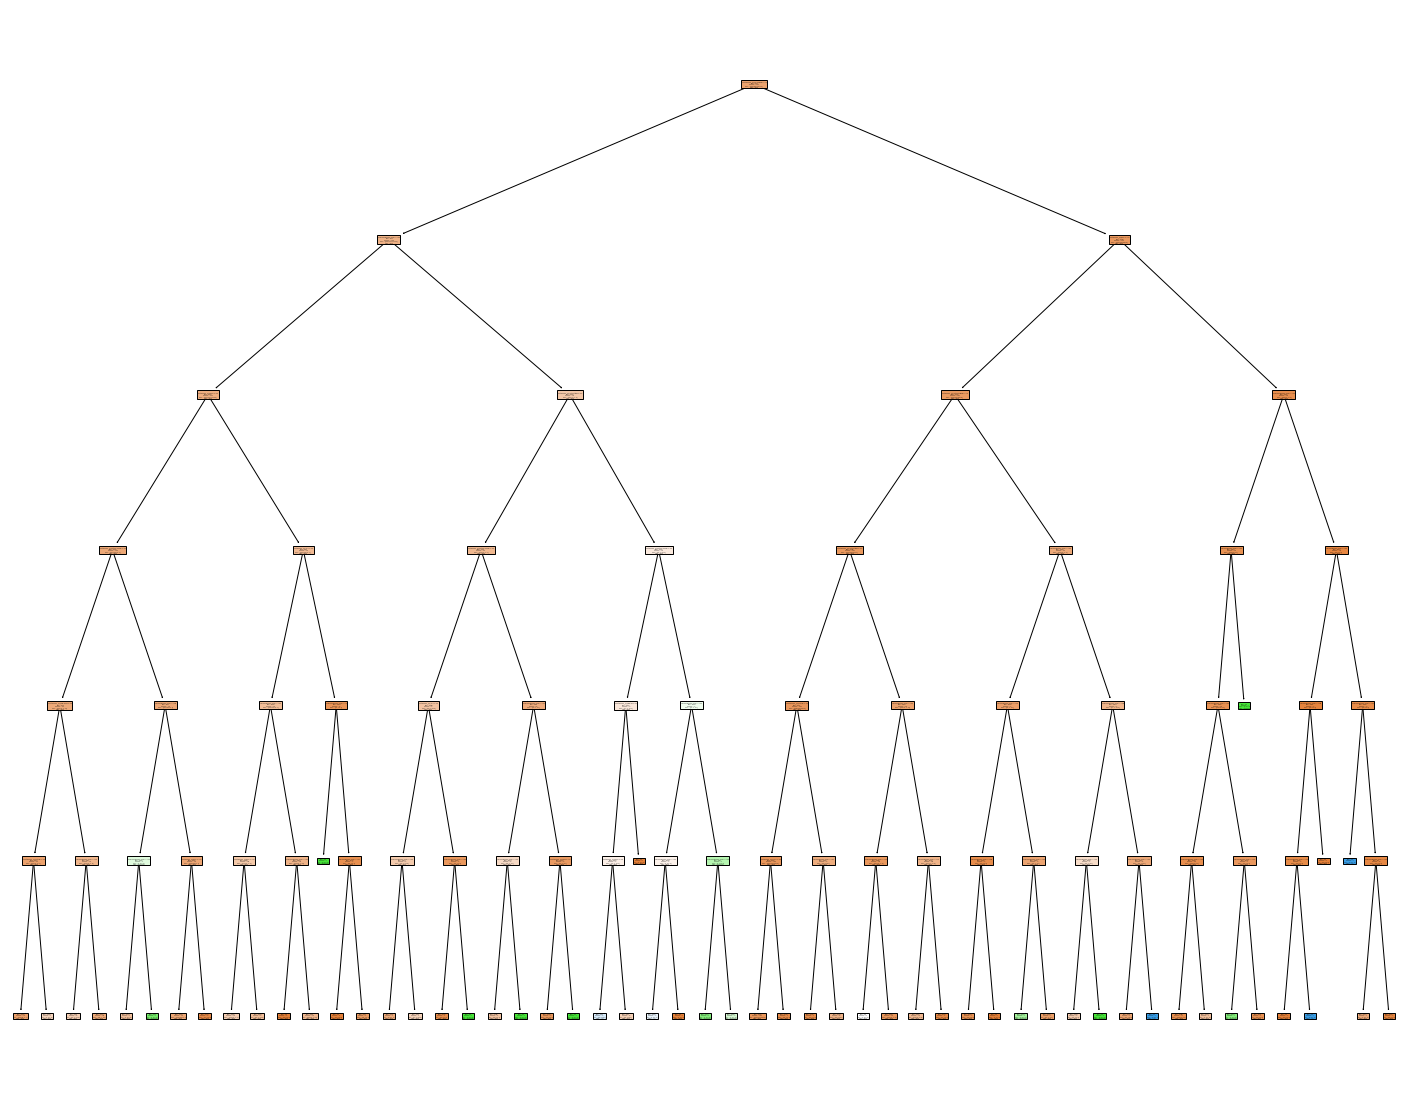

In [124]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_model, 
                   feature_names=X_test.columns,  
                   class_names=['False','Misleading','True','Unproven'],
                   filled=True)

In [71]:
from sklearn import metrics
metrics.accuracy_score(y_test,dtree_predictions)

0.7736883320281911

### Reading the test file

In [40]:
from newspaper import Article
from newspaper import Config
import nltk
import pandas as pd
#The user agent has to be obtained from the https://www.whatismybrowser.com/detect/what-is-my-user-agent for running on your system!
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
config = Config()
config.browser_user_agent = user_agent

In [41]:
# test = pd.read_csv('/content/drive/MyDrive/Social Media Mining Project 2/test.csv')
test = pd.read_csv("test.csv")

In [42]:
test

,Country (mentioned),Review Date,Claim,Source,Fact-checked Article
0,Israel,"Mar 17, 2020",Israel discovered the vaccine for the corona v...,news media,https://piaui.folha.uol.com.br/lupa/2020/03/17...
1,Portugal,"Mar 17, 2020",Cristiano Ronaldos hotels will be turned into ...,multiple sources,https://checamos.afp.com/cristiano-ronaldo-nao...
2,Brazil,"Mar 17, 2020","Preta Gil is with Coronavirus. Dragged 300,000...",facebook,https://piaui.folha.uol.com.br/lupa/2020/03/17...
3,Poland,"Mar 17, 2020",Example - closing schools when there were some...,person,https://demagog.org.pl/wypowiedzi/zamkniecie-s...
4,Germany,"Mar 17, 2020","No, Germany for the coronavirus does not put 2...",person,https://pagellapolitica.it/dichiarazioni/8549/...
...,...,...,...,...,...
705,United States,No data,Gen. David Berger said the Marines wouldn't co...,instagram,https://www.factcheck.org/2021/08/scicheck-mar...
706,United States,No data,15-year-old boy passes away from heart attack ...,blog,https://www.politifact.com/factchecks/2021/may...
707,United States,No data,â€œChris Christie is in ICU and reported to be...,social media,https://www.politifact.com/factchecks/2020/oct...
708,Denmark,No data,Christian Eriksen's collapse is due to coronav...,instagram,https://www.politifact.com/factchecks/2021/jun...


In [43]:
test['Fact-checked Article'][1]

'https://checamos.afp.com/cristiano-ronaldo-nao-anunciou-plano-de-transformar-hoteis-em-hospitais-para-pacientes-do-novo'

In [44]:
url = "https://checamos.afp.com/cristiano-ronaldo-nao-anunciou-plano-de-transformar-hoteis-em-hospitais-para-pacientes-do-novo"
news = Article(url, config=config) 
news.download()
news.parse()
nltk.download('punkt')
news.nlp()
# Extract summary
print(news.summary)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rmanoger\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Cristiano Ronaldo não anunciou plano de transformar hotéis em hospitais para pacientes do novo coronavírusCopyright © AFP 2017-2022.
A alegação de que o jogador de futebol Cristiano Ronaldo pretende transformar seus hotéis em Portugal em hospitais para pessoas infectadas pelo novo coronavírus foi compartilhada dezenas de milhares de vezes em diversos idiomas e em múltiplas redes sociais.
“Cristiano Ronaldo vai transformar seus hotéis em Portugal em hospitais para ajudar na luta contra o coronavírus e eles serão usados gratuitamente.
A alegação de que o jogador pretende transformar seus hotéis em hospitais para atender pacientes desta doença é, no entanto, falsa.
Em resumo, é falso que o jogador de futebol português Cristiano Ronaldo pretenda transformar seus hotéis em hospitais para pacientes do novo coronavírus.


In [45]:
def fil(url):
    try:
        news = Article(url, config=config) 
        news.download()
        news.parse()
        news.nlp()
        return news.summary
    except:
        return ''
test['summary'] = test.apply(lambda x: fil(x['Fact-checked Article']),axis=1)

In [46]:
test[test['summary']!='']

,Country (mentioned),Review Date,Claim,Source,Fact-checked Article,summary
1,Portugal,"Mar 17, 2020",Cristiano Ronaldos hotels will be turned into ...,multiple sources,https://checamos.afp.com/cristiano-ronaldo-nao...,Cristiano Ronaldo não anunciou plano de transf...
3,Poland,"Mar 17, 2020",Example - closing schools when there were some...,person,https://demagog.org.pl/wypowiedzi/zamkniecie-s...,Zamknięcie szkół w Polsce i we Francji w związ...
4,Germany,"Mar 17, 2020","No, Germany for the coronavirus does not put 2...",person,https://pagellapolitica.it/dichiarazioni/8549/...,"Il senatore Gianluigi Paragone, espulso dal M5..."
7,Portugal,"Mar 17, 2020",Cristiano Ronaldos hotels will be turned into ...,social media,https://cekfakta.tempo.co/fakta/674/fakta-atau...,Selain menjadikan hotelnya sebagai rumah sakit...
8,India,"Mar 17, 2020",Punjab police arrest coronavirus victims,social media,https://hindi.boomlive.in/fake-news/video-of-m...,पंजाब पुलिस की मॉक ड्रिल का एक वीडियो वास्तविक...
...,...,...,...,...,...,...
705,United States,No data,Gen. David Berger said the Marines wouldn't co...,instagram,https://www.factcheck.org/2021/08/scicheck-mar...,A Marine Corps spokesperson told us “there is ...
706,United States,No data,15-year-old boy passes away from heart attack ...,blog,https://www.politifact.com/factchecks/2021/may...,Authorities say they investigate all reports c...
707,United States,No data,â€œChris Christie is in ICU and reported to be...,social media,https://www.politifact.com/factchecks/2020/oct...,Chris Christie announced on Oct. 3 that he had...
708,Denmark,No data,Christian Eriksen's collapse is due to coronav...,instagram,https://www.politifact.com/factchecks/2021/jun...,"Danish soccer player Christian Eriksen, 29, su..."


In [49]:
test['Source'] = test['Source'].replace(Source_mapping)
test['Country (mentioned)'] = test['Country (mentioned)'].replace(Country_mapping)

In [50]:
test['Country (mentioned)'].unique()

array(['Others', 'Portugal', 'Brazil', 'United States', 'Indonesia',
       'India', 'Italy', 'China', 'France', 'Spain', 'United Kingdom',
       'Vatican', 'Cambodia', 'Sudan', 'Comoros', 'Gabon', 'Andorra',
       'Namibia'], dtype=object)

In [51]:
test['Source'].unique()

array(['news media', 'multiple sources', 'social media', 'person',
       'websites', 'others', 'blog'], dtype=object)

In [77]:
test['cosine_sim_scores'] = test.apply(lambda x: nlp(x['Claim']).similarity(nlp(x['summary'])),axis=1)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.
C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  """Entry point for launching an IPython kernel.


In [79]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd


transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Country (mentioned)','Source']),
    remainder='passthrough')

transformed_test_cos_sim = transformer.fit_transform(test)
transformed_df_test_cos_sim = pd.DataFrame(
    transformed_test_cos_sim, 
    columns=transformer.get_feature_names()
)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
transformed_df_test_cos_sim.columns

Index(['onehotencoder__x0_Andorra', 'onehotencoder__x0_Brazil',
       'onehotencoder__x0_Cambodia', 'onehotencoder__x0_China',
       'onehotencoder__x0_Comoros', 'onehotencoder__x0_France',
       'onehotencoder__x0_Gabon', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Namibia', 'onehotencoder__x0_Others',
       'onehotencoder__x0_Portugal', 'onehotencoder__x0_Spain',
       'onehotencoder__x0_Sudan', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x0_Vatican',
       'onehotencoder__x1_blog', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites', 'Review Date', 'Claim',
       'Fact-checked Article', 'summary', 'SBERT CrossEncoder_score',
       'cosine_sim_scores'],
      dtype='object')

In [82]:
X = transformed_df_test_cos_sim[['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites','cosine_sim_scores']]


In [83]:
dtree_predictions = dtree_model.predict(X)

In [86]:
dtree_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
submisssion__ = pd.DataFrame({'Id':range(1,len(X)+1),'Category':dtree_predictions})

In [88]:
submisssion__.to_csv('Submission2_CosSim.csv',index=False)

### Approach 2: Using CrossEncoder since it captures the semantic similarity

In [30]:
from sentence_transformers import CrossEncoder

# Load the pre-trained model
model = CrossEncoder('cross-encoder/stsb-roberta-base')

Downloading:   0%|          | 0.00/608 [00:00<?, ?B/s]

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\huggingface_hub\file_download.py:125: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rmanoger\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/142 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [32]:
sentence_pairs = []
for sentence1, sentence2 in zip(data['summary'], data['Claim']):
    sentence_pairs.append([sentence1, sentence2])
    
data['SBERT CrossEncoder_score'] = model.predict(sentence_pairs, show_progress_bar=True)

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [93]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd


transformer = make_column_transformer(
    (OneHotEncoder(), ['Country (mentioned)','Source']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [94]:
transformed_df.columns

Index(['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States',
       'onehotencoder__x1_government department',
       'onehotencoder__x1_multiple sources', 'onehotencoder__x1_news media',
       'onehotencoder__x1_others', 'onehotencoder__x1_person',
       'onehotencoder__x1_social media', 'onehotencoder__x1_websites',
       'Review Date', 'Claim', 'Label', 'Fact-checked Article', 'summary',
       'tokenize_Claim', 'tokenize_summary', 'embeddings_Claim',
       'embeddings_summary', 'SBERT CrossEncoder_score'],
      dtype='object')

In [95]:
X = transformed_df[['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites','SBERT CrossEncoder_score']]
y = transformed_df['Label'].values
y=y.astype('int')

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [98]:
from sklearn import metrics
metrics.accuracy_score(y_test,dtree_predictions)

0.7705559906029757

In [47]:
sentence_pairs_test = []
for sentence1, sentence2 in zip(test['summary'], test['Claim']):
    sentence_pairs_test.append([sentence1, sentence2])
    
test['SBERT CrossEncoder_score'] = model.predict(sentence_pairs_test, show_progress_bar=True)

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

In [48]:
test

,Country (mentioned),Review Date,Claim,Source,Fact-checked Article,summary,SBERT CrossEncoder_score
0,Israel,"Mar 17, 2020",Israel discovered the vaccine for the corona v...,news media,https://piaui.folha.uol.com.br/lupa/2020/03/17...,,0.155913
1,Portugal,"Mar 17, 2020",Cristiano Ronaldos hotels will be turned into ...,multiple sources,https://checamos.afp.com/cristiano-ronaldo-nao...,Cristiano Ronaldo não anunciou plano de transf...,0.512800
2,Brazil,"Mar 17, 2020","Preta Gil is with Coronavirus. Dragged 300,000...",facebook,https://piaui.folha.uol.com.br/lupa/2020/03/17...,,0.002953
3,Poland,"Mar 17, 2020",Example - closing schools when there were some...,person,https://demagog.org.pl/wypowiedzi/zamkniecie-s...,Zamknięcie szkół w Polsce i we Francji w związ...,0.462299
4,Germany,"Mar 17, 2020","No, Germany for the coronavirus does not put 2...",person,https://pagellapolitica.it/dichiarazioni/8549/...,"Il senatore Gianluigi Paragone, espulso dal M5...",0.400960
...,...,...,...,...,...,...,...
705,United States,No data,Gen. David Berger said the Marines wouldn't co...,instagram,https://www.factcheck.org/2021/08/scicheck-mar...,A Marine Corps spokesperson told us “there is ...,0.580482
706,United States,No data,15-year-old boy passes away from heart attack ...,blog,https://www.politifact.com/factchecks/2021/may...,Authorities say they investigate all reports c...,0.590668
707,United States,No data,â€œChris Christie is in ICU and reported to be...,social media,https://www.politifact.com/factchecks/2020/oct...,Chris Christie announced on Oct. 3 that he had...,0.498163
708,Denmark,No data,Christian Eriksen's collapse is due to coronav...,instagram,https://www.politifact.com/factchecks/2021/jun...,"Danish soccer player Christian Eriksen, 29, su...",0.670260


In [101]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd


transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Country (mentioned)','Source']),
    remainder='passthrough')

transformed = transformer.fit_transform(test)
transformed_df_test = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

C:\Users\rmanoger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
transformed_df_test.columns

Index(['onehotencoder__x0_Andorra', 'onehotencoder__x0_Brazil',
       'onehotencoder__x0_Cambodia', 'onehotencoder__x0_China',
       'onehotencoder__x0_Comoros', 'onehotencoder__x0_France',
       'onehotencoder__x0_Gabon', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Namibia', 'onehotencoder__x0_Others',
       'onehotencoder__x0_Portugal', 'onehotencoder__x0_Spain',
       'onehotencoder__x0_Sudan', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x0_Vatican',
       'onehotencoder__x1_blog', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites', 'Review Date', 'Claim',
       'Fact-checked Article', 'summary', 'SBERT CrossEncoder_score',
       'cosine_sim_scores'],
      dtype='object')

In [103]:
X = transformed_df_test[['onehotencoder__x0_Brazil', 'onehotencoder__x0_China',
       'onehotencoder__x0_France', 'onehotencoder__x0_India',
       'onehotencoder__x0_Indonesia', 'onehotencoder__x0_Italy',
       'onehotencoder__x0_Others', 'onehotencoder__x0_Portugal',
       'onehotencoder__x0_Spain', 'onehotencoder__x0_United Kingdom',
       'onehotencoder__x0_United States', 'onehotencoder__x1_multiple sources',
       'onehotencoder__x1_news media', 'onehotencoder__x1_others',
       'onehotencoder__x1_person', 'onehotencoder__x1_social media',
       'onehotencoder__x1_websites','SBERT CrossEncoder_score']]


In [104]:
label_predictions = dtree_model.predict(X)


In [105]:
label_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
submisssion = pd.DataFrame({'Id':range(1,len(X)+1),'Category':label_predictions})

In [107]:
submisssion.to_csv('Submission1_CrossEncoder.csv',index=False)